In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = "/content/drive/MyDrive/legal_train_labelled.csv"

## 1. Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

if not os.path.exists(file_path):
    print(f"File '{file_path}' not found! Please check the path.")
else:
    df = pd.read_csv(file_path)
from IPython.display import display
display(df)

,Unnamed: 0,judgement,dataset_name,summary,predicted_labels
0,0,Appeal No. LXVI of 1949.\nAppeal from the High...,IN-Abs,The charge created in respect of municipal pro...,property
1,1,Civil Appeal No.94 of 1949.\n107 834 Appeal fr...,IN-Abs,"An agreement for a lease, which a lease is by ...",property
2,2,"iminal Appeal No. 40 of 1951, 127 Appeal from ...",IN-Abs,"The question whether a Magistrate is ""personal...",family
3,3,Appeal No. 388 of 1960.\nAppeal by special lea...,IN-Abs,The appellant was a member of a joint Hindu fa...,family
4,4,Appeal No. 198 of 1954.\nAppeal from the judgm...,IN-Abs,The appellant was the Ruler of the State of Ba...,property
...,...,...,...,...,...
995,995,ivil Appeal No. 414 of 1965.\nAppeal from the ...,IN-Abs,The appellant .company reduced its capital and...,constitutional
996,996,ivil Appeal No. 195 of 1963.\nAppeal from the ...,IN-Abs,A widow whose estate was under the charge of t...,family
997,997,Appeal No. 765 of1964.\nAppeal by special leav...,IN-Abs,The appellant 's election was challenged inter...,constitutional
998,998,ivil Appeal No. 875 of 1964.\nAppeal by specia...,IN-Abs,The appellant and respondent were the tenant a...,property


## 2. Exploratory Data Analyis



,Unnamed: 0,judgement,dataset_name,summary,predicted_labels
0,0,Appeal No. LXVI of 1949.\nAppeal from the High...,IN-Abs,The charge created in respect of municipal pro...,property
1,1,Civil Appeal No.94 of 1949.\n107 834 Appeal fr...,IN-Abs,"An agreement for a lease, which a lease is by ...",property
2,2,"iminal Appeal No. 40 of 1951, 127 Appeal from ...",IN-Abs,"The question whether a Magistrate is ""personal...",family
3,3,Appeal No. 388 of 1960.\nAppeal by special lea...,IN-Abs,The appellant was a member of a joint Hindu fa...,family
4,4,Appeal No. 198 of 1954.\nAppeal from the judgm...,IN-Abs,The appellant was the Ruler of the State of Ba...,property



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   judgement         1000 non-null   object
 2   dataset_name      1000 non-null   object
 3   summary           1000 non-null   object
 4   predicted_labels  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
        Unnamed: 0
count  1000.000000
mean    499.500000
std     288.819436
min       0.000000
25%     249.750000
50%     499.500000
75%     749.250000
max     999.000000

Dataset Shape: (1000, 5)


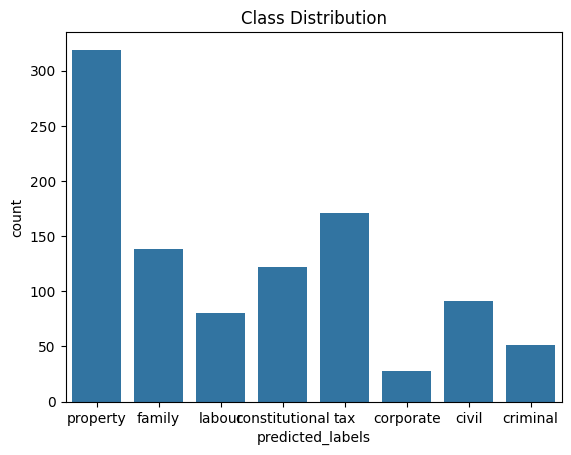

Unnamed: 0          0
judgement           0
dataset_name        0
summary             0
predicted_labels    0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(file_path)

display(df.head())

print("\nDataset Info:")
print(df.info())
print(df.describe())

print(f"\nDataset Shape: {df.shape}")

sns.countplot(x='predicted_labels', data=df)
plt.title("Class Distribution")
plt.show()

print(df.isnull().sum())

## 3. Text Processing


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['judgement'].apply(clean_text)

df[['judgement', 'cleaned_text']].head()
df.to_csv('output.csv', index=False)

## 4. NLP Based Feature Generation


In [ ]:
import numpy as np

In [ ]:

def generate_nlp_features(df):
    df['char_count'] = df['cleaned_text'].apply(len)
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))
    return df

df = generate_nlp_features(df)
df[['cleaned_text','char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,cleaned_text,char_count,word_count,avg_word_length,stopword_count,htag_count
0,appeal lxvi appeal high court judicature bomba...,12439,1737,6.161773,0,0
1,civil appeal appeal judgment decree high court...,8894,1267,6.020521,0,0
2,iminal appeal appeal judgment order dated st j...,11824,1532,6.718668,0,0
3,appeal appeal special leave judgment order dat...,12857,1648,6.802184,0,0
4,appeal appeal judgment order dated october for...,9472,1238,6.651858,0,0


## 5. BOW, FastText, TF-IDF Feature Generation


In [ ]:
pip install fasttext

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext.util
import numpy as np

In [ ]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
# !gunzip cc.en.300.bin.gzc

In [ ]:
# fasttext.util.download_model('en', if_exists='ignore')

In [ ]:
import joblib
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])
# df['bow_features'] = list(X_bow.toarray())

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
# df['tfidf_features'] = list(X_tfidf.toarray())

ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)
print(X_tfidf)
# joblib.dump(bow_vectorizer, 'bow_vectorizer.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
# joblib.dump(X_tfidf.shape[1], 'tfidf_feature_count.pkl')  # Save feature count
# fasttext_embeddings = np.array(df['fasttext_embeddings'].tolist())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 589766 stored elements and shape (1000, 5000)>
  Coords	Values
  (0, 574)	0.04016084308322997
  (0, 2323)	0.033222991554168954
  (0, 1382)	0.040891292380041876
  (0, 2664)	0.025619185896463427
  (0, 869)	0.11209007882362422
  (0, 3832)	0.02484630500930108
  (0, 4145)	0.13666707226697927
  (0, 2472)	0.034475009254108034
  (0, 2449)	0.18477427889628992
  (0, 4535)	0.2852897977830662
  (0, 370)	0.0949256291058163
  (0, 3081)	0.03820725396258113
  (0, 583)	0.013233114260390446
  (0, 2735)	0.014554467069005574
  (0, 2952)	0.013830141062932434
  (0, 4201)	0.009350369225248874
  (0, 720)	0.03585675809901736
  (0, 2196)	0.0280231084438765
  (0, 2471)	0.005023523417526156
  (0, 3985)	0.003988953357100035
  (0, 2951)	0.017768351937688994
  (0, 2661)	0.017157604164760327
  (0, 1526)	0.0035359500787626647
  (0, 1016)	0.011223413468312194
  (0, 2879)	0.012237627937088628
  :	:
  (999, 3968)	0.015433565900982113
  (999, 3531)	0.0167927608

['tfidf_vectorizer.pkl']

## 6. Train All Supervised Models on NLP-Based Features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['predicted_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append([name, acc, precision, recall, f1])
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\nOverall Model Comparison:\n")
print(results_df)



Random Forest Performance:
                precision    recall  f1-score   support

         civil       0.25      0.18      0.21        17
constitutional       0.35      0.21      0.26        29
     corporate       0.00      0.00      0.00         4
      criminal       0.12      0.12      0.12         8
        family       0.23      0.24      0.24        25
        labour       0.13      0.12      0.13        16
      property       0.27      0.34      0.30        65
           tax       0.37      0.39      0.38        36

      accuracy                           0.27       200
     macro avg       0.22      0.20      0.20       200
  weighted avg       0.27      0.27      0.26       200


SVM Performance:
                precision    recall  f1-score   support

         civil       0.00      0.00      0.00        17
constitutional       0.00      0.00      0.00        29
     corporate       0.00      0.00      0.00         4
      criminal       0.00      0.00      0.00         

## 7-9. Train Models on BoW, TFIDF, and FastText Features

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

features = {
    "BoW": X_bow,
    "TF-IDF": X_tfidf,
    "FastText": np.vstack(df['fasttext_embeddings'])
}
y = df['predicted_labels']
for feat_name, X_feat in features.items():
    print(f"\n Evaluating Models on {feat_name} Features:")
    X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=42)


    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)



        print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



 Evaluating Models on BoW Features:
Random Forest - Accuracy: 0.5550, Precision: 0.5550, Recall: 0.5550, F1 Score: 0.4809
SVM - Accuracy: 0.4900, Precision: 0.4545, Recall: 0.4900, F1 Score: 0.3845
Logistic Regression - Accuracy: 0.5000, Precision: 0.4471, Recall: 0.5000, F1 Score: 0.4656

 Evaluating Models on TF-IDF Features:
Random Forest - Accuracy: 0.5550, Precision: 0.5732, Recall: 0.5550, F1 Score: 0.4702
SVM - Accuracy: 0.5400, Precision: 0.5608, Recall: 0.5400, F1 Score: 0.4378
Logistic Regression - Accuracy: 0.5400, Precision: 0.5327, Recall: 0.5400, F1 Score: 0.4499

 Evaluating Models on FastText Features:
Random Forest - Accuracy: 0.5350, Precision: 0.5019, Recall: 0.5350, F1 Score: 0.4618
SVM - Accuracy: 0.4800, Precision: 0.3194, Recall: 0.4800, F1 Score: 0.3492
Logistic Regression - Accuracy: 0.3750, Precision: 0.2514, Recall: 0.3750, F1 Score: 0.2411


## 10. Train Models on All Combined Features with TFIDF

In [ ]:
y=df['predicted_labels']

In [ ]:
from scipy.sparse import hstack
X_combined = hstack([X, X_tfidf])
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Accuracy: 0.33


In [ ]:
import pandas as pd

# Overall Model Comparison
overall_comparison = {
    "Model": ["Random Forest", "SVM", "Logistic Regression", "Naive Bayes"],
    "Accuracy": [0.270, 0.315, 0.335, 0.330],
    "Precision": [0.2694, 0.103934, 0.179114, 0.238402],
    "Recall": [0.270, 0.315, 0.335, 0.330],
    "F1 Score": [0.264876, 0.156298, 0.195841, 0.271980]
}
overall_df = pd.DataFrame(overall_comparison)

# Evaluating Models on Different Features
def create_feature_df(feature_name, data):
    return pd.DataFrame(data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]).assign(Feature=feature_name)

bow_data = [
    ["Random Forest", 0.5550, 0.5550, 0.5550, 0.4809],
    ["SVM", 0.4900, 0.4545, 0.4900, 0.3845],
    ["Logistic Regression", 0.5000, 0.4471, 0.5000, 0.4656]
]
bow_df = create_feature_df("BoW", bow_data)

tfidf_data = [
    ["Random Forest", 0.5550, 0.5732, 0.5550, 0.4702],
    ["SVM", 0.5400, 0.5608, 0.5400, 0.4378],
    ["Logistic Regression", 0.5400, 0.5327, 0.5400, 0.4499]
]
tfidf_df = create_feature_df("TF-IDF", tfidf_data)

fasttext_data = [
    ["Random Forest", 0.5350, 0.5019, 0.5350, 0.4618],
    ["SVM", 0.4800, 0.3194, 0.4800, 0.3492],
    ["Logistic Regression", 0.3750, 0.2514, 0.3750, 0.2411]
]
fasttext_df = create_feature_df("FastText", fasttext_data)

# Combine all feature-based evaluations
feature_df = pd.concat([bow_df, tfidf_df, fasttext_df], ignore_index=True)

# Display the dataframes
from IPython.display import display
print("Overall Model Comparison:")
display(overall_df)
print("\nEvaluating Models on Different Features:")
display(feature_df)


Overall Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.270,0.269400,0.270,0.264876
1,SVM,0.315,0.103934,0.315,0.156298
2,Logistic Regression,0.335,0.179114,0.335,0.195841
3,Naive Bayes,0.330,0.238402,0.330,0.271980



Evaluating Models on Different Features:


,Model,Accuracy,Precision,Recall,F1 Score,Feature
0,Random Forest,0.555,0.5550,0.555,0.4809,BoW
1,SVM,0.490,0.4545,0.490,0.3845,BoW
2,Logistic Regression,0.500,0.4471,0.500,0.4656,BoW
3,Random Forest,0.555,0.5732,0.555,0.4702,TF-IDF
4,SVM,0.540,0.5608,0.540,0.4378,TF-IDF
5,Logistic Regression,0.540,0.5327,0.540,0.4499,TF-IDF
6,Random Forest,0.535,0.5019,0.535,0.4618,FastText
7,SVM,0.480,0.3194,0.480,0.3492,FastText
8,Logistic Regression,0.375,0.2514,0.375,0.2411,FastText


## 11. Save the Model and Make Predictions on Real-World Input

In [ ]:
import joblib
from scipy.sparse import hstack

joblib.dump(model, 'text_classification_model.pkl')
loaded_model = joblib.load('text_classification_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
expected_feature_count = joblib.load('tfidf_feature_count.pkl')  # Load expected feature count

new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]

# Use the same feature representation as training
new_text_features = tfidf_vectorizer.transform(new_text_cleaned)  # Ensure consistency

# Predict
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')


NameError: name 'model' is not defined